# Sea Level Predictor

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

## Import Data

In [2]:
df = pd.read_csv("epa-sea-level.csv")
df

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN
...,...,...,...,...,...
129,2009,8.586614,8.311024,8.862205,8.046354
130,2010,8.901575,8.618110,9.185039,8.122973
131,2011,8.964567,8.661417,9.267717,8.053065
132,2012,9.326772,8.992126,9.661417,8.457058


## Data Cleaning

In [3]:
df.isnull()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,False,False,False,False,True
1,False,False,False,False,True
2,False,False,False,False,True
3,False,False,False,False,True
4,False,False,False,False,True
...,...,...,...,...,...
129,False,False,False,False,False
130,False,False,False,False,False
131,False,False,False,False,False
132,False,False,False,False,False


In [4]:
df.isna().sum()

Year                          0
CSIRO Adjusted Sea Level      0
Lower Error Bound             0
Upper Error Bound             0
NOAA Adjusted Sea Level     113
dtype: int64

Note: NaN values are all in "NOAA Adjusted Sea Level" column because it was not recorded yet during these earlier years. Hence, replace these NaN values with zero.

In [5]:
df["NOAA Adjusted Sea Level"] = df["NOAA Adjusted Sea Level"].fillna(0)
df["NOAA Adjusted Sea Level"]

0      0.000000
1      0.000000
2      0.000000
3      0.000000
4      0.000000
         ...   
129    8.046354
130    8.122973
131    8.053065
132    8.457058
133    8.546648
Name: NOAA Adjusted Sea Level, Length: 134, dtype: float64

In [6]:
# Check
df.isna().sum()

Year                        0
CSIRO Adjusted Sea Level    0
Lower Error Bound           0
Upper Error Bound           0
NOAA Adjusted Sea Level     0
dtype: int64

In [7]:
df.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,0.0
1,1881,0.220472,-0.732283,1.173228,0.0
2,1882,-0.440945,-1.346457,0.464567,0.0
3,1883,-0.232283,-1.129921,0.665354,0.0
4,1884,0.590551,-0.283465,1.464567,0.0


## Data Analysis

Use matplotlib to create a scatter plot using the "Year" column as the x-axis and the "CSIRO Adjusted Sea Level" column as the y-axix.

In [8]:
x = df["Year"]
y = df["CSIRO Adjusted Sea Level"]

Text(0, 0.5, 'Sea Level (inches)')

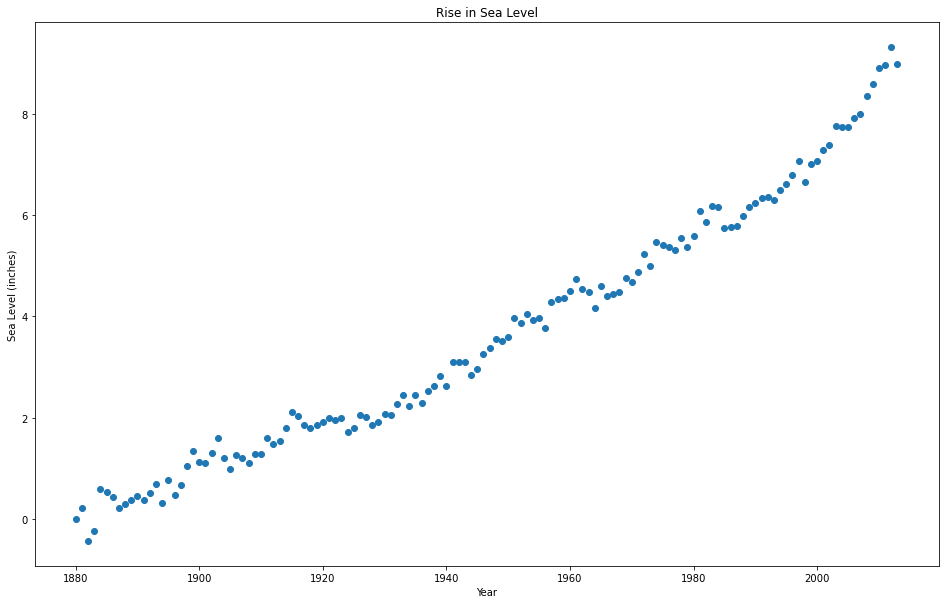

In [9]:
plt.figure(figsize=(16.2,10))

plt.scatter(x, y)
plt.title("Rise in Sea Level")
plt.xlabel("Year")
plt.ylabel("Sea Level (inches)")

Use the linregress function from scipi.stats to get the slope and y-intercept of the line of best fit. Plot the line of best fit over the top of the scatter plot. Make the line go through the year 2050 to predict the sea level rise in 2050.

In [10]:
linregress_output = stats.linregress(x, y)
linregress_output

LinregressResult(slope=0.0630445840121348, intercept=-119.06594196773978, rvalue=0.984757131182585, pvalue=3.7886969791131554e-102, stderr=0.000969211871328715)

In [11]:
slope = linregress_output[0] 
slope

0.0630445840121348

In [12]:
y_intercept = linregress_output[1]
y_intercept

-119.06594196773978

In [13]:
df

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,0.000000
1,1881,0.220472,-0.732283,1.173228,0.000000
2,1882,-0.440945,-1.346457,0.464567,0.000000
3,1883,-0.232283,-1.129921,0.665354,0.000000
4,1884,0.590551,-0.283465,1.464567,0.000000
...,...,...,...,...,...
129,2009,8.586614,8.311024,8.862205,8.046354
130,2010,8.901575,8.618110,9.185039,8.122973
131,2011,8.964567,8.661417,9.267717,8.053065
132,2012,9.326772,8.992126,9.661417,8.457058


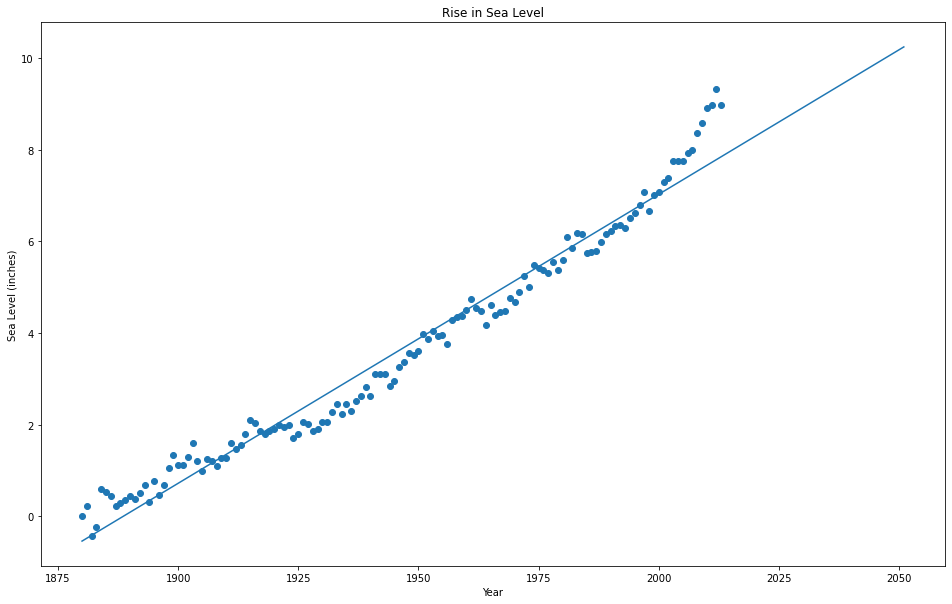

In [14]:
plt.figure(figsize=(16.2,10))

plt.scatter(x, y)
plt.title("Rise in Sea Level")
plt.xlabel("Year")
plt.ylabel("Sea Level (inches)")

# x_fit = np.linspace(np.min(x), np.max(x))
x_fit = np.linspace(np.min(x), 2051)


# regression line formula: y = b0 + b1x1
y_fit = y_intercept + slope*x_fit

plt.plot(x_fit, y_fit)

Plot a new line of best fit just using the data from year 2000 through the most recent year in the dataset. Make the line also go through the year 2050 to predict the sea level rise in 2050 if the rate of rise continues as it has since the year 2000.

In [15]:
df

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,0.000000
1,1881,0.220472,-0.732283,1.173228,0.000000
2,1882,-0.440945,-1.346457,0.464567,0.000000
3,1883,-0.232283,-1.129921,0.665354,0.000000
4,1884,0.590551,-0.283465,1.464567,0.000000
...,...,...,...,...,...
129,2009,8.586614,8.311024,8.862205,8.046354
130,2010,8.901575,8.618110,9.185039,8.122973
131,2011,8.964567,8.661417,9.267717,8.053065
132,2012,9.326772,8.992126,9.661417,8.457058


In [16]:
x_2k = df["Year"].loc[120:133]
x_2k

120    2000
121    2001
122    2002
123    2003
124    2004
125    2005
126    2006
127    2007
128    2008
129    2009
130    2010
131    2011
132    2012
133    2013
Name: Year, dtype: int64

In [17]:
y_2k = df["CSIRO Adjusted Sea Level"].loc[120:133]
y_2k

120    7.062992
121    7.287402
122    7.381890
123    7.759843
124    7.740157
125    7.744094
126    7.917323
127    7.996063
128    8.350394
129    8.586614
130    8.901575
131    8.964567
132    9.326772
133    8.980315
Name: CSIRO Adjusted Sea Level, dtype: float64

In [18]:
linregress_output = stats.linregress(x_2k, y_2k)
linregress_output

LinregressResult(slope=0.16642727333186808, intercept=-325.79346680596467, rvalue=0.976287571614062, pvalue=2.4388064141616947e-09, stderr=0.010652933111541106)

In [19]:
slope_2k = linregress_output[0] 
slope_2k

0.16642727333186808

In [20]:
y_intercept_2k = linregress_output[1]
y_intercept_2k

-325.79346680596467

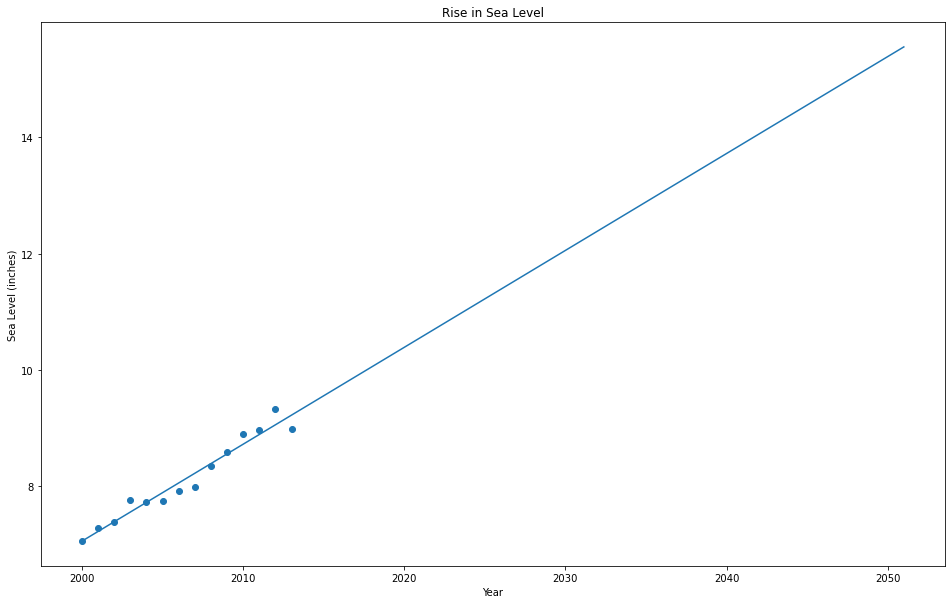

In [21]:
plt.figure(figsize=(16.2,10))

plt.scatter(x_2k, y_2k)
plt.title("Rise in Sea Level")
plt.xlabel("Year")
plt.ylabel("Sea Level (inches)")

# x_fit_2k = np.linspace(np.min(x_2k), np.max(x_2k))
x_fit_2k = np.linspace(np.min(x_2k), 2051)


# regression line formula: y = b0 + b1x1
y_fit_2k = y_intercept_2k + slope_2k*x_fit_2k

plt.plot(x_fit_2k, y_fit_2k)